Optimal Bayes Classifier
The Optimal Bayes classifier chooses the class that has greatest a posteriori probability of occurrence (so called maximum a posteriori estimation, or MAP). It can be shown that of all classifiers, the Optimal Bayes classifier is the one that will have the lowest probability of miss classifying an observation, i.e. the lowest probability of error. So if we know the posterior distribution, then using the Bayes classifier is as good as it gets.

In real-life we usually do not know the posterior distribution, but rather we estimate it. The Naive Bayes classifier approximates the optimal Bayes classifier by looking at the empirical distribution and by assuming independence of predictors. So the Naive Bayes classifier is not itself optimal, but it approximates the optimal solution.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

In [3]:
def predict_Bayes_class(X,mu_list,sigma_list):
  #Returns the predicted class from an optimal bayes classifier - distributions must be known
  scores_list = []
  classes = len(mu_list)
  
  for p in range(classes):
      score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
      scores_list.append(score)
            
  return np.argmax(scores_list)

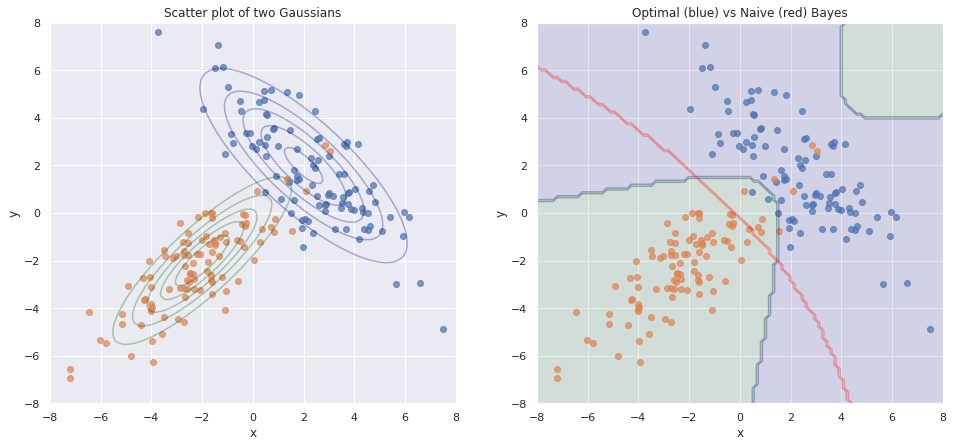

In [4]:
np.random.seed(seed = 3)

mu1 = [2, 2]
sigma1 = [[5, -4], [-4, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

mu2 = [-2, -2]
sigma2 = [[3.5, 3], [3, 3.5]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    #Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)
    #Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])

ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))

ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')

plt.show()

# New Section

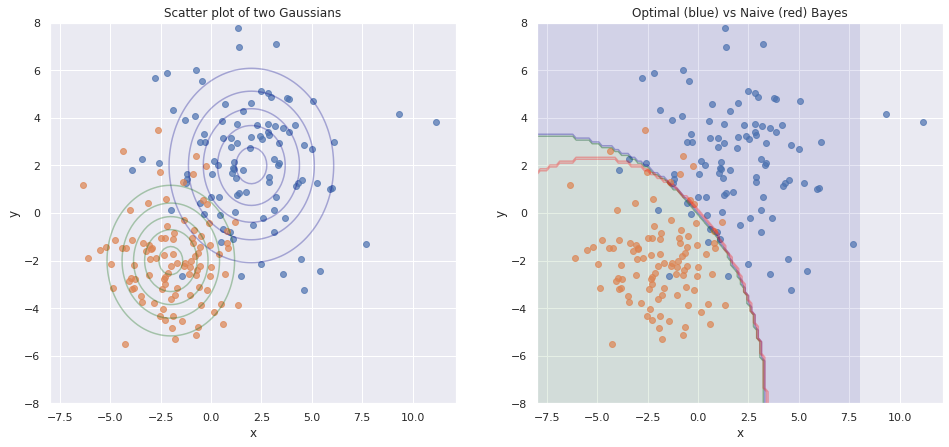

In [5]:
np.random.seed(seed = 2)

mu1 = [2, 2]
sigma1 = [[5, 0], [0, 5]]
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

mu2 = [-2, -2]
sigma2 = [[3, 0], [0, 3]]
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]
color_list = ['darkblue','darkgreen']

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-8, 8, N)
Y = np.linspace(-8, 8, N)
X, Y = np.meshgrid(X, Y)

#Setup of figure
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Plotting the contours of the Gaussians on left hand side plot
for i in range(2):
    zz = np.array(  [scipy.stats.multivariate_normal.pdf(np.array([xx,yy]), mean=mu_list[i], cov=sigma_list[i]) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
    Z = zz.reshape(X.shape)

#Plot the  contours
    ax.contour( X, Y, Z, 5, alpha = .3, colors = color_list[i])


ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of two Gaussians')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

#Right hand side plot - Optimal Bayes classifier
ax = fig.add_subplot(1, 2, 2)

#Plotting the contours of the Gaussians on left hand side plot

zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('darkblue','darkgreen'))
ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('darkblue','darkgreen'))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

#Predictions for each point on meshgrid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the  contours
ax.contour( X, Y, Z, 1, alpha = .3, colors = ('red'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Optimal (blue) vs Naive (red) Bayes')



plt.show()

# New Section

# New Section

In [6]:
#Optimal Bayes accuracy
y_pred = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
display(np.mean(y_pred == y_labels))


#Naive Bayes accuracy
display(model_sk.score(X_data,y_labels))

0.91

0.91